#Traffic Analysis and Forecasting for E-commerce Platform - ShopEase

Company Background:
ShopEase is a leading e-commerce platform specializing in a wide range of products including electronics, fashion, home goods, and more. Established in 2015, ShopEase has grown rapidly, attracting millions of users globally. The platform aims to enhance user experience and engagement through personalized recommendations and seamless navigation.

Objective:
The primary objective is to analyze and forecast traffic on the ShopEase platform. This involves understanding user behavior, identifying key traffic sources, and predicting future trends to optimize marketing strategies and improve user engagement.

Metrics and Data Overview:

Session primary channel group:

1.Categories: Direct, Organic Search, Paid Ads, Social Media, Email Campaigns.

2.Date + hour (YYYYMMDDHH):
Data collected hourly from January 2023 to December 2023.

3.Users:
Number of unique visitors per hour.

4.Sessions:
Number of browsing sessions per hour.

5.Engaged sessions:
Sessions with significant engagement (e.g., adding items to cart, making purchases).

6.Average engagement time per session:
Average time (in minutes) spent per session.

7.Engaged sessions per user:
Ratio of engaged sessions to total sessions per user.

8.Events per session:
Average number of actions (product views, clicks) per session.

9.Engagement rate:
Proportion of sessions that were engaged.

10.Event count:
Total number of actions taken on the site during the period.

In [73]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import io
import kaleido
pio.renderers.default = "png"
import matplotlib.pyplot as plt

In [74]:
from google.colab import files
uploaded = files.upload()

Saving data-export.csv to data-export (2).csv


In [75]:
data = pd.read_csv(io.BytesIO(uploaded['data-export (2).csv']))

In [76]:
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [77]:
new_header = data.iloc[0]
data = data[1:]
data.columns = new_header
data.reset_index(drop=True, inplace=True)

In [78]:
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [80]:
data.isnull().sum()

0
Session primary channel group (Default channel group)    0
Date + hour (YYYYMMDDHH)                                 0
Users                                                    0
Sessions                                                 0
Engaged sessions                                         0
Average engagement time per session                      0
Engaged sessions per user                                0
Events per session                                       0
Engagement rate                                          0
Event count                                              0
dtype: int64

In [81]:
data.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [82]:
data['Session primary channel group (Default channel group)'].value_counts()

Session primary channel group (Default channel group)
Direct            672
Organic Social    672
Organic Search    672
Referral          672
Unassigned        366
Organic Video     125
Email               3
Name: count, dtype: int64

#EDA - Exploratory Data Analysis

#Analyzing the total users and sessions over time:

In [83]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

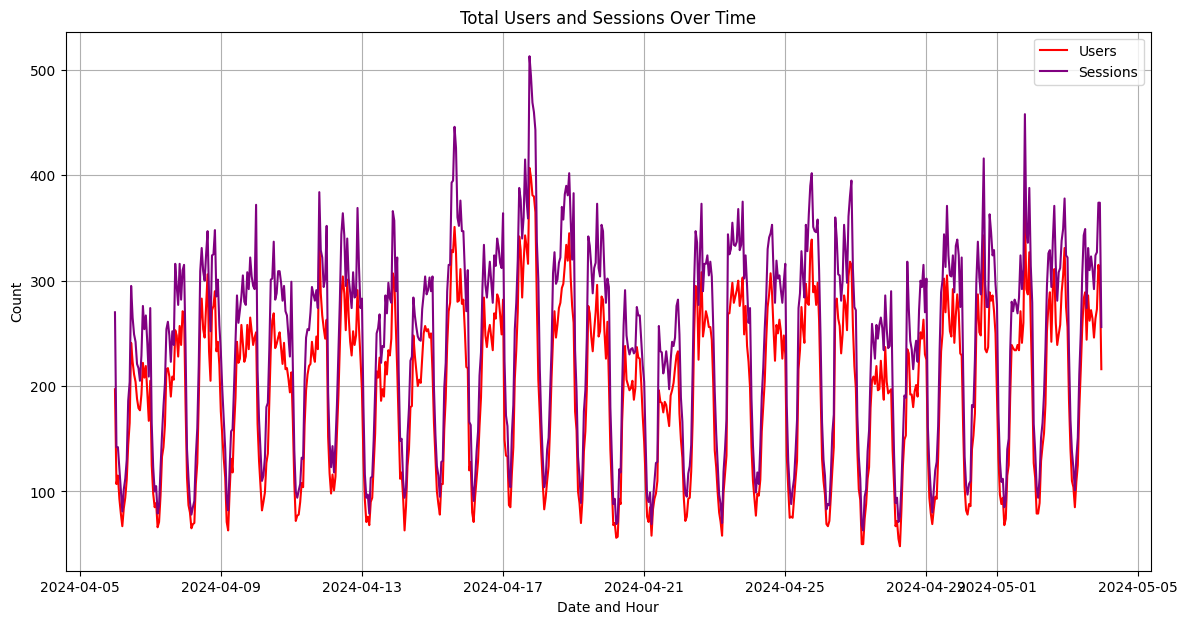

In [84]:
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='red')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='purple')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

From the graph, we can observe there are some fluctuations in the number of users and sessions, possibly indicating daily cycles or specific high-traffic periods. Both users and sessions appear to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks might correspond to specific marketing activities, promotions, or events.

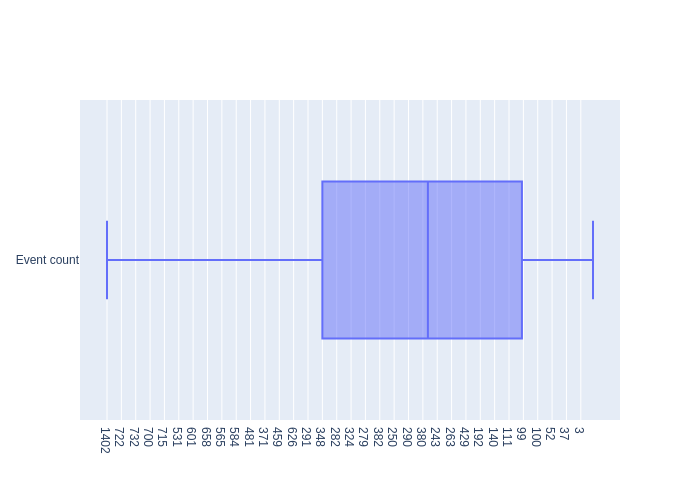

In [85]:
fig = go.Figure()
fig.add_trace(go.Box(x=data['Event count'],
                     name='Event count'))

fig.show("png")

No Outlier Values in Event Count Column

#convert relevant columns to numeric for engagement analysis

In [86]:
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])


# group data by date and calculate mean for engagement metrics

In [87]:
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

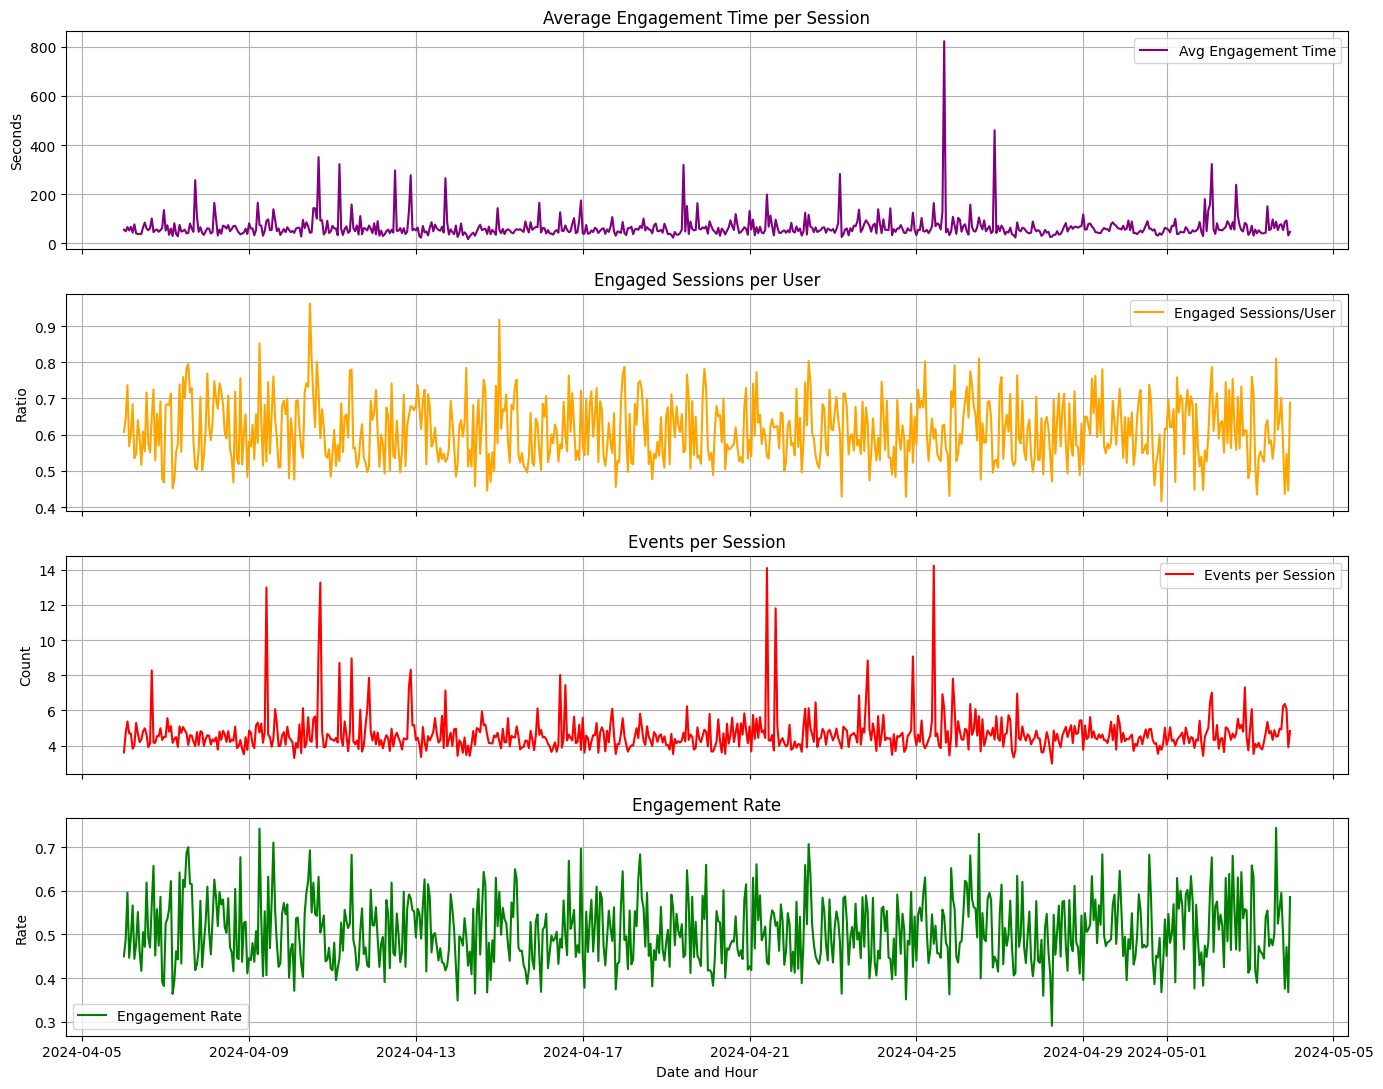

In [88]:
fig, ax = plt.subplots(4, 1, figsize=(14, 11), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

1.Average Engagement Time per Session: The time spent per session shows fluctuations over the observed period. There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events.

2.Engaged Sessions per User: This ratio fluctuates slightly but generally indicates that a good portion of sessions per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging.

3.Events per Session: The count of events per session remains relatively consistent but does show some variation. Peaks here could indicate more interactive content or features being used by visitors.

4.Engagement Rate: The engagement rate over time shows how many sessions are considered engaged out of the total. There are some ups and downs which may relate to how different content resonates with users or how effective certain user acquisition channels are.

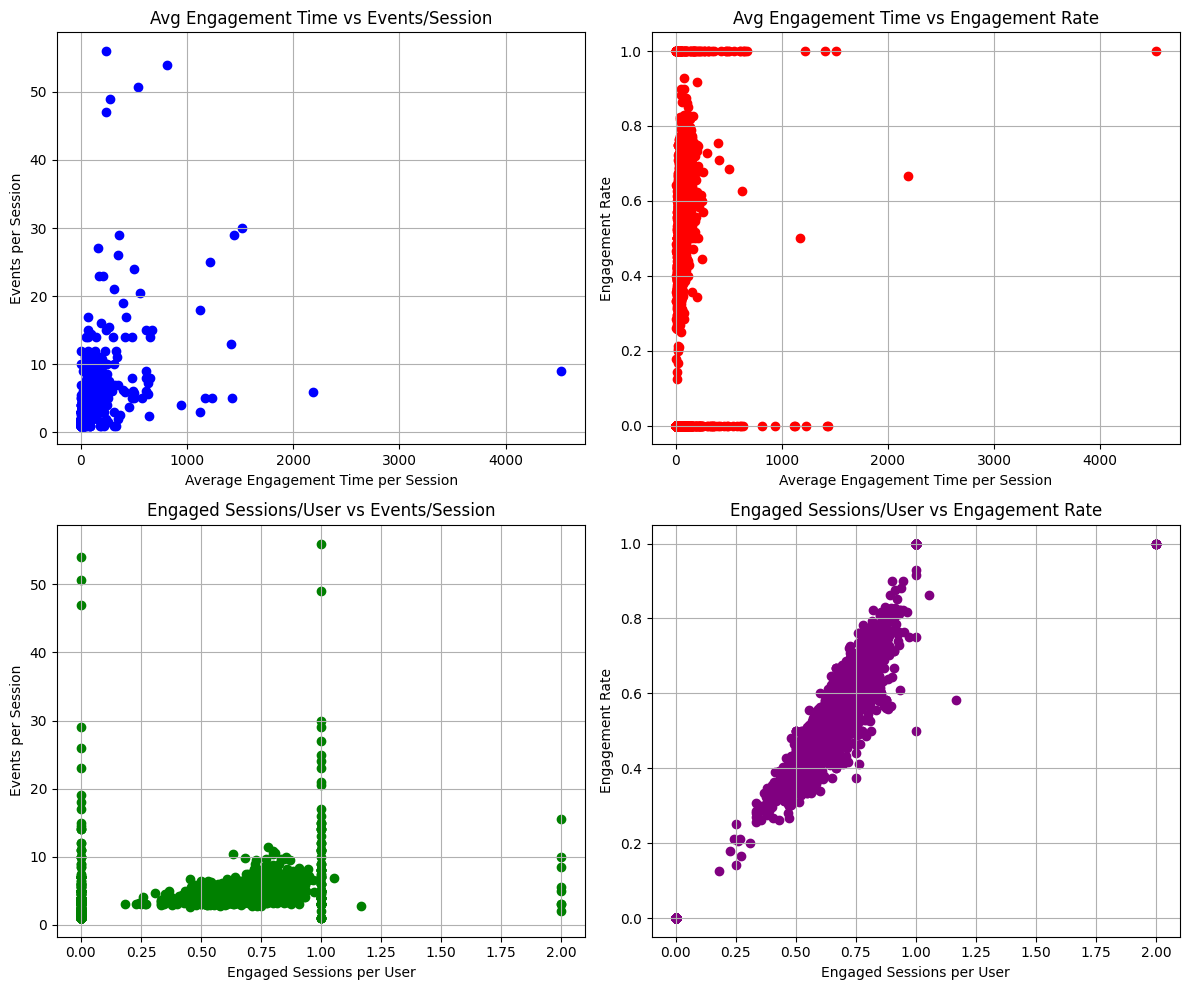

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)


axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)


axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)


axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

1.Average Engagement Time vs Events per Session: There appears to be a concentration of data points at lower average engagement times with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more narrowly around lower values.

2.Average Engagement Time vs Engagement Rate: There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.

3.Engaged Sessions per User vs Events per Session: Most data points cluster at lower values for both metrics, with few users having a high number of engaged sessions or events per session.

4.Engaged Sessions per User vs Engagement Rate: There is a strong positive correlation between engaged sessions per user and engagement rate, especially noticeable at higher values of engaged sessions per user.


# group data by channel and aggregate necessary metrics

In [90]:
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

In [91]:
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()


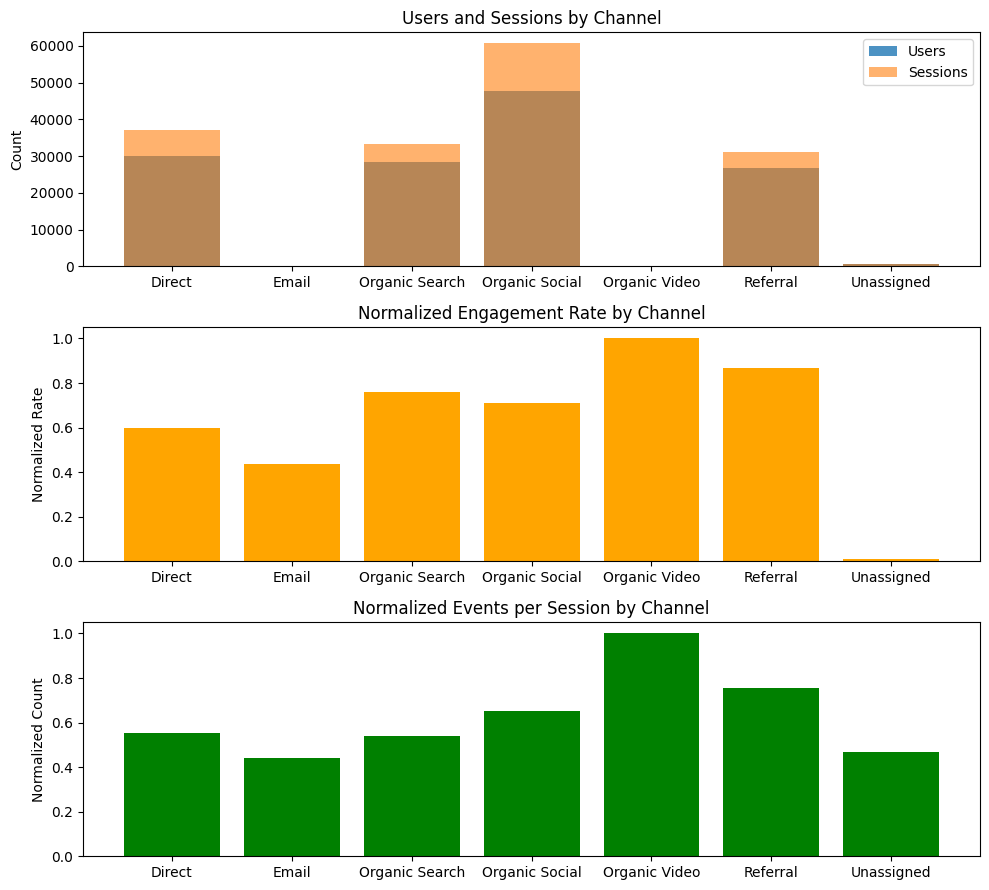

In [92]:
fig, ax = plt.subplots(3, 1, figsize=(10, 9))


ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')


ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

The data illustrates significant variations in performance across different channels, highlighting the strengths and weaknesses of each in driving traffic, engaging users, and encouraging interactions. The high performance of ‘Organic Search’ in driving traffic contrasts with its lower relative engagement and events metrics, suggesting quantity over quality of visits. In contrast, ‘Referral’ and ‘Organic Video’ channels, while not leading in volume, excel in engaging users deeply, pointing to potential areas for leveraging these strengths in marketing strategies.

#Forecasting E-Commerce Platform Traffic

In [93]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss



time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')


adf_result = adfuller(time_series_data)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')


kpss_result = kpss(time_series_data, regression='c')
print('\nKPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print(f'\t{key}: {value}')


if adf_result[1] < 0.05:
    print("\nThe series is stationary according to the ADF test.")
else:
    print("\nThe series is non-stationary according to the ADF test.")

if kpss_result[1] > 0.05:
    print("The series is stationary according to the KPSS test.")
else:
    print("The series is non-stationary according to the KPSS test.")


ADF Statistic: -3.0123861134761603
p-value: 0.033753772131504815
Critical Values:
	1%: -3.440434903803665
	5%: -2.865989920612213
	10%: -2.569139761751388

KPSS Statistic: 0.1341764959333403
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

The series is stationary according to the ADF test.
The series is stationary according to the KPSS test.


<ipython-input-93-6e443e0ba249>:17: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




<Figure size 640x480 with 0 Axes>

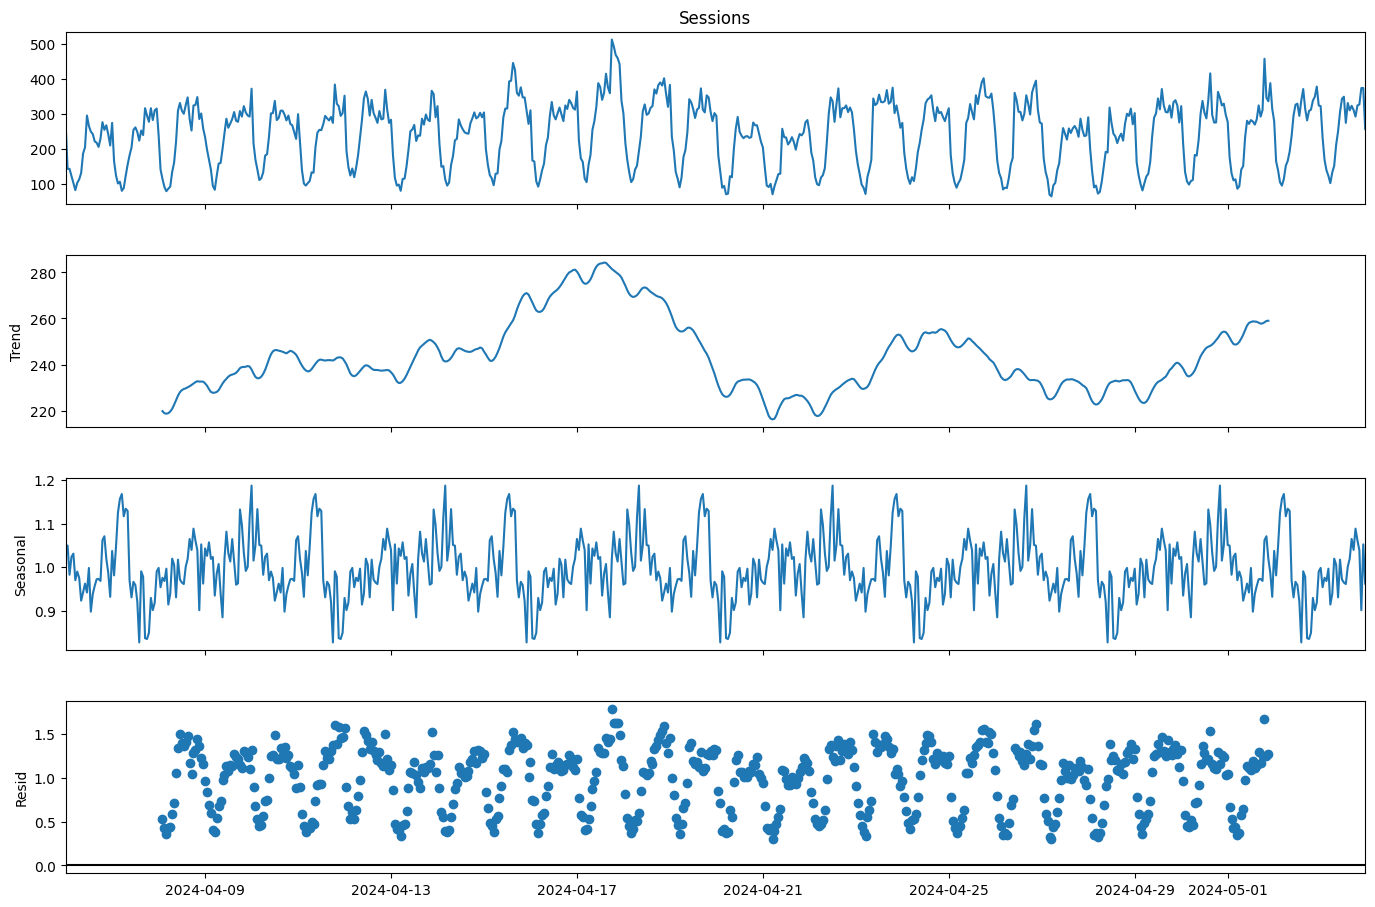

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(grouped_data["Sessions"],
                            model='multiplicative', period = 100)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

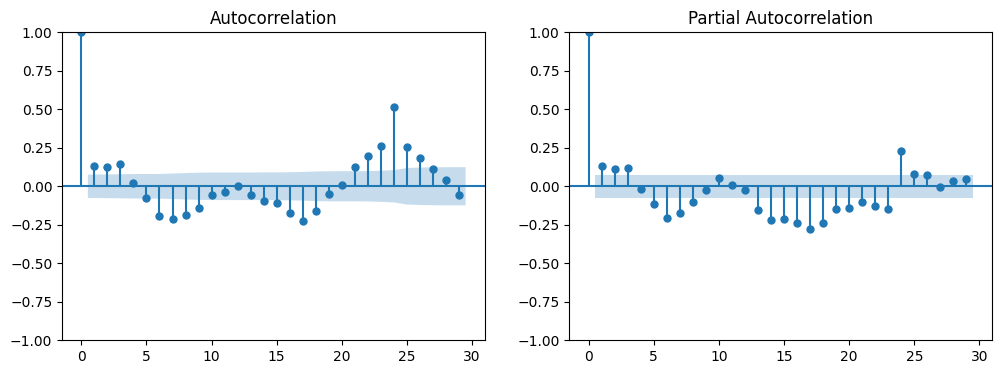

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

PACF (Partial Autocorrelation Function): This plot helps determine the p parameter for the AR part of the model. You look for the lag after which most partial autocorrelations are not significantly different from zero. In our plot, the PACF shows a significant spike at lag 1 and then cuts off, suggesting an AR part of order 1. Therefore, p=1.

ACF (Autocorrelation Function): This plot helps identify the q parameter for the MA part of the model. You look for the lag after which most autocorrelations are not significantly different from zero. The ACF plot in our case tails off gradually, but considering the first significant spike is essential. Since the spike at lag 1 is significant and there’s a gradual tailing off rather than a sharp cut-off, it suggests a potential MA component. However, the tailing-off nature complicates the exact determination of q, but a starting point of q=1 could be considered.

The other parameter is d, representing seasonality. In our case, as seasonality exists, we can choose the value of d as 1. Now, here’s how we can forecast the website’s traffic for the next 24 hours using the SARIMA model:

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

In [97]:
sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Sessions   No. Observations:                  672
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -3106.667
Date:                            Sat, 29 Jun 2024   AIC                           6223.334
Time:                                    05:32:06   BIC                           6245.695
Sample:                                04-06-2024   HQIC                          6232.009
                                     - 05-03-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3192      0.064      4.986      0.000       0.194       0.445
ma.L1         -0.7437      0.047   

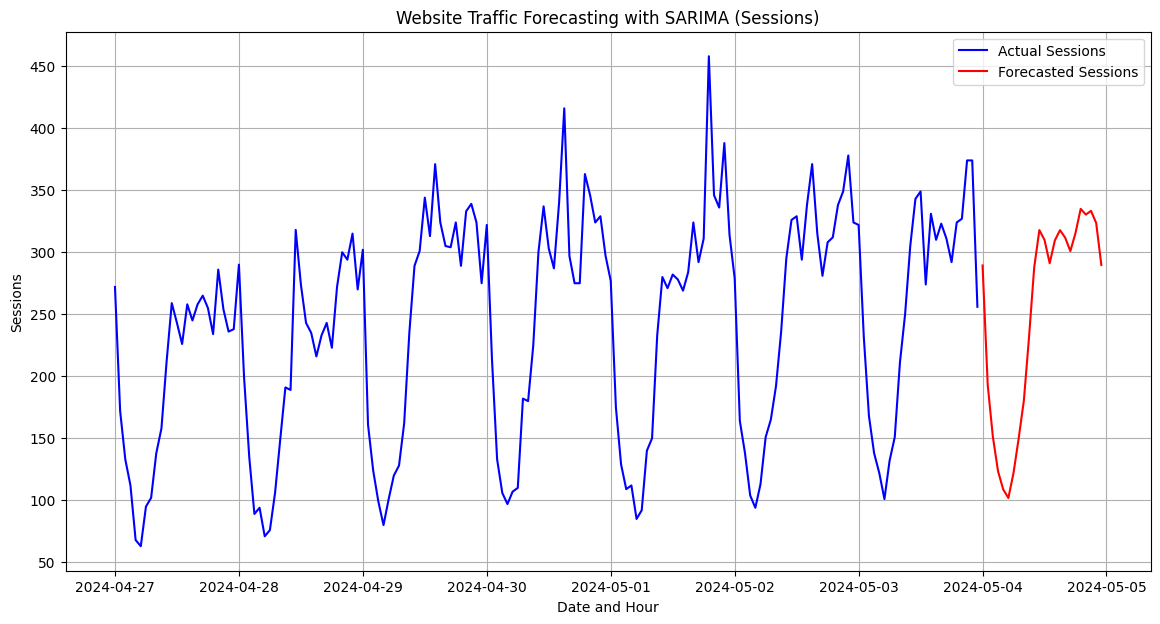

In [98]:
sarima_forecast = sarima_model_fit.forecast(steps=24)


plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()

# Include the last actual data point in the forecast series

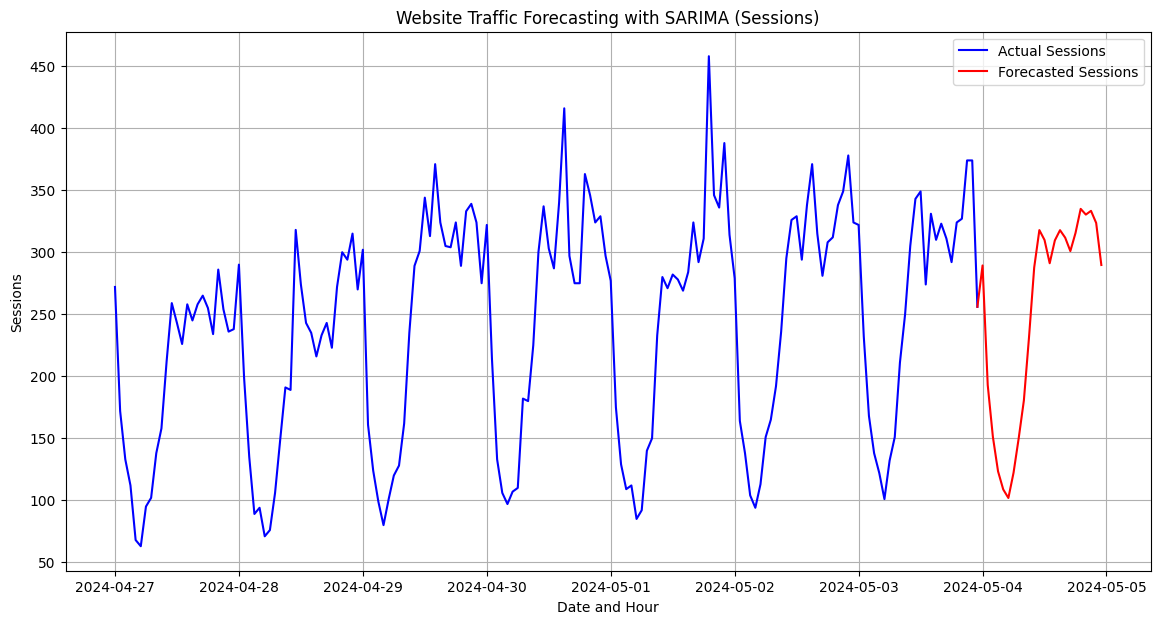

In [99]:


sarima_forecast = sarima_model_fit.forecast(steps=24)

forecast_index = pd.date_range(time_series_data.index[-1], periods=25, freq='H')
sarima_forecast = pd.Series([time_series_data.iloc[-1]] + list(sarima_forecast), index=forecast_index)


plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')
plt.plot(sarima_forecast.index, sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()

#Thank You